# Hey README, tell me your secrets 

## Plan

Goal: Scrape READMEs in github to determine their respective programing language

To Do: 
- Find readmes to scrape, at least 100 
- Pull content

Findings: 

In [1]:
# data wrangling
import pandas as pd
import numpy as np
import json

#visuals
import matplotlib.pyplot as plt
import seaborn as sns

# modules
import acquire
import prepare
import explore
import model

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Acquire

A list of 100 pages to scrape are generated using the `acquire.loop_through_urls` function. They are saved to a csv and that csv file is being read for further manipulation. 

In [2]:
# to_scrape = acquire.loop_through_urls()
# to_scrape = pd.DataFrame(to_scrape)
# to_scrape.to_csv("URL_list_100_final.csv")

In [3]:
# read in list of pages generated from function 
pd.read_csv("URL_list_100.csv", header=0, names=["page"])

,page
0,http://github.com/freeCodeCamp/freeCodeCamp
1,http://github.com/996icu/996.ICU
2,http://github.com/vuejs/vue
3,http://github.com/facebook/react
4,http://github.com/tensorflow/tensorflow
...,...
95,http://github.com/ansible/ansible
96,http://github.com/kdn251/interviews
97,http://github.com/gatsbyjs/gatsby
98,http://github.com/opencv/opencv


The dataframe of 100 pages that was just created is looped through, and on each page, it's respective repository, language, and readme is extracted as a dictionary, using the `acquire.make_corpus` function. 

The `acquire.get_corpus` fuction checks to see if the data file is in the cache. If it is, it reads it in as a dataframe, if file is not in cache, the above mentioned function is run to generate it.

In [4]:
df_init = acquire.get_corpus()

In [5]:
df_init

,repo,language,readme
0,freeCodeCamp/freeCodeCamp,JavaScript,\n\n\n\n\n\nfreeCodeCamp.org's open-source cod...
1,996icu/996.ICU,Rust,\n996.ICU\nPlease note that there exists NO ot...
2,vuejs/vue,JavaScript,\n\n\n\n\n\n\n\n\n\n\n\nSupporting Vue.js\nVue...
3,facebook/react,JavaScript,\nReact · \nReact is a JavaScript library f...
4,tensorflow/tensorflow,C++,\n\n\n\n\n\n\nDocumentation\n\n\n\n\n\n\n\n\nT...
...,...,...,...
95,ansible/ansible,Python,\n\n \n \n \n \n \n\n\nAnsible\nAnsible is a ...
96,kdn251/interviews,Java,\nInterviews\n\nYour personal guide to Softwar...
97,gatsbyjs/gatsby,JavaScript,\n\n\n\n\n\n\n Gatsby v2\n\n\n⚛️ 📄 🚀\n\n\n F...
98,opencv/opencv,C++,\nOpenCV: Open Source Computer Vision Library\...


## Prepare

In [6]:
# make a copy for prepping and exploring
df = df_init.copy()

In [7]:
df.language.value_counts(dropna=False)

JavaScript          34
Python              14
None                12
Java                 8
C++                  6
TypeScript           6
Go                   4
Rust                 2
C                    2
Vue                  2
C#                   1
Ruby                 1
CSS                  1
Clojure              1
PHP                  1
Dart                 1
Assembly             1
Jupyter Notebook     1
Shell                1
HTML                 1
Name: language, dtype: int64

Using the `prepare.cut_singles` function, remove the languages that only have a single readme represented.

In [8]:
df = prepare.cut_singles(df)

In [9]:
df.language.value_counts()

JavaScript    34
Python        14
None          12
Java           8
TypeScript     6
C++            6
Go             4
C              2
Vue            2
Rust           2
Name: language, dtype: int64

In [10]:
# prepare.prep_readme(df)

In [11]:
df["readme"] = df.readme.apply(prepare.better_clean).apply(prepare.remove_stopwords).apply(prepare.lemmatize)

In [12]:
df

,repo,language,readme
0,freeCodeCamp/freeCodeCamp,JavaScript,freecodecamp org open source codebase curricul...
1,996icu/996.ICU,Rust,icu please note exists official account app me...
2,vuejs/vue,JavaScript,supporting vue vue mit licensed open source pr...
3,facebook/react,JavaScript,react react javascript library building user i...
4,tensorflow/tensorflow,C++,documentation tensorflow end end open source p...
...,...,...,...
95,ansible/ansible,Python,ansible ansible radically simple automation sy...
96,kdn251/interviews,Java,interview personal guide software engineering ...
97,gatsbyjs/gatsby,JavaScript,gatsby fast every way matter gatsby free open ...
98,opencv/opencv,C++,opencv open source computer vision library res...


## Explore

In [22]:
# what is the breakdown of programming languages 
explore.count_percent(df)

,n,percent
JavaScript,34,0.377778
Python,14,0.155556
None,12,0.133333
Java,8,0.088889
TypeScript,6,0.066667
C++,6,0.066667
Go,4,0.044444
C,2,0.022222
Vue,2,0.022222
Rust,2,0.022222


In [17]:
explore.readme_length(df)

,min,mean,max
language,,,
C,71,2024.500000,3978
C++,61,520.500000,1230
Go,137,3866.500000,14868
Java,20,746.750000,2382
JavaScript,50,1092.764706,7425
None,120,3230.333333,19864
Python,31,3110.071429,9934
Rust,433,606.500000,780
TypeScript,40,496.500000,1594


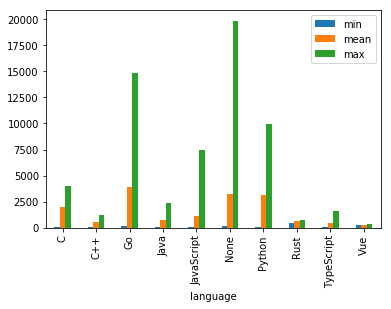

In [21]:
explore.readme_length(df).plot.bar()
plt.show()

### Model

Model will use the entire 100 rows of corpus. It is then stripped of unnecssary characters and brokend down into 

components with lemmatization.

In [2]:
df = acquire.get_corpus()
df['clean_and_lem'] = df.readme.apply(prepare.basic_clean).apply(prepare.lemmatize)
df = prepare.cut_singles(df)

The data is broken into training and testing sets. In this instance it will be a 70/30 split.

In [3]:
X_train, X_test, train, test = model.make_model_components(df.clean_and_lem, df.language, .3)

In [4]:
predictons = model.run_the_tree_model(X_train, train.actual, 6)
train['predictions'] = predictons

#### Accuracy scores for the model on the Training set

In [5]:
model.score_your_model(train.actual, train.predictions)

Accuracy: 93.65%
---
Confusion Matrix
actual       C  C++  Go  Java  JavaScript  None  Python  Rust  TypeScript  Vue
predictions                                                                   
C            1    0   1     0           0     0       0     0           0    1
C++          0    3   0     0           0     0       0     0           0    0
Go           0    0   2     0           0     0       1     0           0    0
Java         0    0   0     6           0     0       0     0           0    0
JavaScript   0    1   0     0          24     0       0     0           0    0
None         0    0   0     0           0     9       0     0           0    0
Python       0    0   0     0           0     0       9     0           0    0
Rust         0    0   0     0           0     0       0     1           0    0
TypeScript   0    0   0     0           0     0       0     0           4    0
---
              precision    recall  f1-score   support

           C       0.33      1.00 

#### Accuracy scores for the model on the Test set

In [7]:
test_predictons = model.run_the_tree_model(X_test, test.actual, 6)
test['predictions'] = test_predictons
model.score_your_model(test.actual, test.predictions)

Accuracy: 100.00%
---
Confusion Matrix
actual       C  C++  Go  Java  JavaScript  None  Python  Rust  TypeScript  Vue
predictions                                                                   
C            1    0   0     0           0     0       0     0           0    0
C++          0    2   0     0           0     0       0     0           0    0
Go           0    0   1     0           0     0       0     0           0    0
Java         0    0   0     2           0     0       0     0           0    0
JavaScript   0    0   0     0          10     0       0     0           0    0
None         0    0   0     0           0     3       0     0           0    0
Python       0    0   0     0           0     0       4     0           0    0
Rust         0    0   0     0           0     0       0     1           0    0
TypeScript   0    0   0     0           0     0       0     0           2    0
Vue          0    0   0     0           0     0       0     0           0    1
---
         